In [0]:
# 30个频率频道 116*116输入   3dcnn2 十个demsity对比  

In [0]:
!pip install import-ipynb
import import_ipynb

In [0]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"
from model_functions import *

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
importing Jupyter notebook from model_functions.ipynb


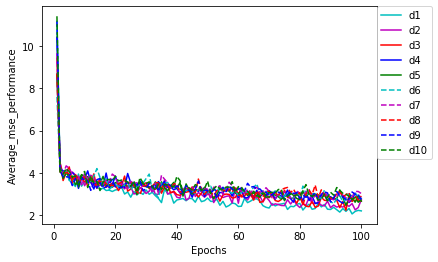

In [0]:
# 跑十个density的mse 并且plot保存起来
d1 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/1/Average_mse_history.npy') 
d2 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/2/Average_mse_history.npy') 
d3 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/3/Average_mse_history.npy') 
d4 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/4/Average_mse_history.npy') 
d5 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/5/Average_mse_history.npy') 
d6 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/6/Average_mse_history.npy') 
d7 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/7/Average_mse_history.npy') 
d8 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/8/Average_mse_history.npy') 
d9 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/9/Average_mse_history.npy') 
d10 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/10/Average_mse_history.npy') 



epochs = range(1,len(average_mse_history)+1)
plt.plot(epochs, d1,'c',  label='d1' )
plt.plot(epochs, d2,'m',  label='d2' )
plt.plot(epochs, d3,'r',  label='d3' )
plt.plot(epochs, d4,'b',  label='d4' )
plt.plot(epochs, d5,'g',  label='d5' )
plt.plot(epochs, d6,'c--',  label='d6' )
plt.plot(epochs, d7,'m--',  label='d7' )
plt.plot(epochs, d8,'r--',  label='d8' )
plt.plot(epochs, d9,'b--',  label='d9' )
plt.plot(epochs, d10,'g--',  label='d10' )

plt.xlabel('Epochs')
plt.ylabel('Average_mse_performance')
# plt.legend()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)
# plt.show()
plt.savefig('/content/drive/My Drive/nor_left_6_10density_mse.png' ,dpi=1200)

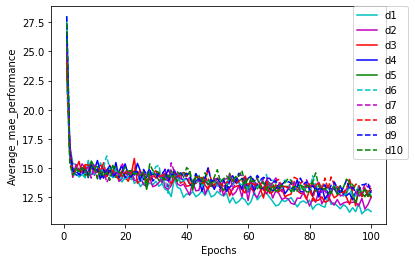

In [0]:
# 跑十个density的mae 并且plot保存起来
d1 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/1/Average_mae_history.npy') 
d2 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/2/Average_mae_history.npy') 
d3 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/3/Average_mae_history.npy') 
d4 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/4/Average_mae_history.npy') 
d5 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/5/Average_mae_history.npy') 
d6 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/6/Average_mae_history.npy') 
d7 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/7/Average_mae_history.npy') 
d8 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/8/Average_mae_history.npy') 
d9 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/9/Average_mae_history.npy') 
d10 = np.load('/content/drive/My Drive/nor_left_6Matrix_10Density/10/Average_mae_history.npy') 



epochs = range(1,len(average_mse_history)+1)
plt.plot(epochs, d1,'c',  label='d1' )
plt.plot(epochs, d2,'m',  label='d2' )
plt.plot(epochs, d3,'r',  label='d3' )
plt.plot(epochs, d4,'b',  label='d4' )
plt.plot(epochs, d5,'g',  label='d5' )
plt.plot(epochs, d6,'c--',  label='d6' )
plt.plot(epochs, d7,'m--',  label='d7' )
plt.plot(epochs, d8,'r--',  label='d8' )
plt.plot(epochs, d9,'b--',  label='d9' )
plt.plot(epochs, d10,'g--',  label='d10' )

plt.xlabel('Epochs')
plt.ylabel('Average_mae_performance')
# plt.legend()
plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
# plt.show()
plt.savefig('/content/drive/My Drive/nor_left_6_10density_mae.png' ,dpi=1200)

In [0]:
# Val_mses = []
# Val_maes = []
# Average_mse_history = []
# Average_mae_history = []

In [0]:

# i = 10
    
# data = np.load('/content/drive/My Drive/changed_input/nor_left/30/' + str(i)+ '.npy') 


# Label = np.load('/content/drive/My Drive/output/nor_left.npy')

# # data = np.reshape(data,(72, 30,116, 116, 1))
# print(data.shape)
# print(Label.shape)


In [0]:

for i in range(1,11):
      
  data = np.load('/content/drive/My Drive/changed_input/nor_left/6/' + str(i)+ '.npy') 


  Label = np.load('/content/drive/My Drive/output/nor_left.npy')

  data = np.reshape(data,(54, 6,116, 116, 1))

  def SPLIT(data,split):

    data, label = shuffle(data, Label, random_state=20)

    train_data = data[:split]
    train_label = label[:split]
    test_data = data[split:]
    test_label = label[split:]

    return train_data, train_label, test_data, test_label


  train_data, train_label, test_data, test_label = SPLIT(data,40) 

  def k_fold(k,train_data,train_targets):
    num_val_samples = len(train_data)//k
    val_mses = []
    val_maes = []
    mse_History = []
    mae_History = []
    num_epochs = 100
    batchsize = 5
    for i in range(k):
      print('processing fold #', i)
      val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
      val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
      partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
      partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
      model = threeD_CNN5()
      history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
      val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
      mse_history = history.history['loss']
      mae_history = history.history['mean_absolute_error']
      val_mses.append(val_mse)
      val_maes.append(val_mae)
      mse_History.append(mse_history)
      mae_History.append(mae_history)
    average_mae_history = [(np.mean([x[i] for x in mae_History]))*100 for i in range(100)] 
    average_mse_history = [(np.mean([x[i] for x in mse_History]))*100 for i in range(100)]
    
    return val_mses, val_maes, average_mse_history, average_mae_history

  val_mses, val_maes, average_mse_history, average_mae_history = k_fold(4,train_data,train_label)

  Val_mses = np.array(val_mses)
  Val_maes = np.array(val_maes)
  Average_mse_history = np.array(average_mse_history)
  Average_mae_history = np.array(average_mae_history) 



  np.save('/content/drive/My Drive/nor_left_6Matrix_10Density/'+ str(i) + '/Val_mses'  , Val_mses)
  np.save('/content/drive/My Drive/nor_left_6Matrix_10Density/'+ str(i) + '/Val_maes'  , Val_maes)
  np.save('/content/drive/My Drive/nor_left_6Matrix_10Density/'+ str(i) + '/Average_mae_history', Average_mae_history)
  np.save('/content/drive/My Drive/nor_left_6Matrix_10Density/'+ str(i) + '/Average_mse_history', Average_mse_history)



In [0]:


# Val_mses = np.array(val_mses)
# Val_maes = np.array(val_maes)
# Average_mse_history = np.array(average_mse_history)
# Average_mae_history = np.array(average_mae_history) 



# np.save('/content/drive/My Drive/nor_left_30Matrix_10Density/'+ str(i) + '/Val_mses'  , Val_mses)
# np.save('/content/drive/My Drive/nor_left_30Matrix_10Density/'+ str(i) + '/Val_maes'  , Val_maes)
# np.save('/content/drive/My Drive/nor_left_30Matrix_10Density/'+ str(i) + '/Average_mae_history', Average_mae_history)
# np.save('/content/drive/My Drive/nor_left_30Matrix_10Density/'+ str(i) + '/Average_mse_history', Average_mse_history)


# #model 3Dcnn 
# epochs = range(1,len(average_mse_history)+1)
# plt.plot(epochs, average_mae_history,'c',  label='mae' )
# plt.plot(epochs, average_mse_history,'m',  label='mse' )
# plt.xlabel('Epochs')
# plt.ylabel('Validation')
# plt.show()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_124 (Conv3D)          (None, 5, 112, 112, 32)   1632      
_________________________________________________________________
max_pooling3d_124 (MaxPoolin (None, 5, 56, 56, 32)     0         
_________________________________________________________________
dropout_124 (Dropout)        (None, 5, 56, 56, 32)     0         
_________________________________________________________________
conv3d_125 (Conv3D)          (None, 4, 52, 52, 64)     102464    
_________________________________________________________________
max_pooling3d_125 (MaxPoolin (None, 4, 26, 26, 64)     0         
_________________________________________________________________
dropout_125 (Dropout)        (None, 4, 26, 26, 64)     0         
_________________________________________________________________
conv3d_126 (Conv3D)          (None, 3, 22, 22, 64)   

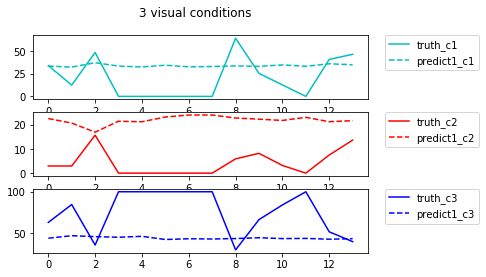

In [0]:
model = threeD_CNN5()
history = model.fit(train_data, train_label, epochs=100, batch_size=5, verbose=0) 
comparision1 = (model.predict(test_data))*100
x_data = range(14)
Test_label = test_label*100
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
fig.suptitle('3 visual conditions') 


predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
# predict_c1.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
# predict_c2.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
# predict_c3.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
# predict_c1.plot(x_data, y_predict3_c1 , 'c-.', label='predict2_c1')
# predict_c2.plot(x_data, y_predict3_c2 , 'r-.', label='predict2_c2')
# predict_c3.plot(x_data, y_predict3_c3 , 'b-.', label='predict2_c3')

predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [0]:
# epochs = range(1,len(average_mse_history)+1)
# plt.plot(epochs, average_mae_history,'c',  label='mae' )
# plt.plot(epochs, average_mse_history,'c--',  label='mse' )
# plt.plot(epochs, average_mae_history1,'m',  label='mae1' )
# plt.plot(epochs, average_mse_history1,'m--',  label='mse1' )
# plt.plot(epochs, average_mae_history2,'r',  label='mae2' )
# plt.plot(epochs, average_mse_history2,'r--',  label='mse2' )
# plt.xlabel('Epochs')
# plt.ylabel('Average_performance')
# plt.legend()
# # plt.show()
# plt.savefig('/content/drive/My Drive/original_30_3models_comparison.png' ,dpi=1200)

In [0]:
# mse1 = history1.history['loss']
# mae1 = history1.history['mean_absolute_error']
# mse2 = history2.history['loss']
# mae2 = history2.history['mean_absolute_error']
# mse3 = history3.history['loss']
# mae3 = history3.history['mean_absolute_error']
# # val_loss = history.history['val_loss']
# # acc = history.history['acc']
# # val_acc=history.history['val_acc']
# epochs = range(1,len(mse1) +1)
# plt.plot(epochs, mse1, 'c', label='mse1')
# plt.plot(epochs, mse2, 'm', label='mse2')
# plt.plot(epochs, mse3, 'r', label='mse3')

# plt.plot(epochs, mae1, 'c--', label='mae1')
# plt.plot(epochs, mae2, 'm--', label='mae2')
# plt.plot(epochs, mae3, 'r--', label='mae3')

# plt.title('loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show() 
# # plt.savefig('/content/drive/My Drive/original_30_3models_comparison.png' ,dpi=2400)

In [0]:
# comparision1 = (model1.predict(test_data))*100
# comparision2 =(model2.predict(test_data))*100
# comparision3 = (model3.predict(test_data))*100
# print(comparision1[0,0])
# print(comparision2)


In [0]:
# x_data = range(24)
# Test_label = test_label*100
# y_data_c1 = Test_label[:,0]
# y_data_c2 = Test_label[:,1]
# y_data_c3 = Test_label[:,2]
# y_predict1_c1 = comparision1[:,0]
# y_predict1_c2 = comparision1[:,1]
# y_predict1_c3 = comparision1[:,2]
# y_predict2_c1 = comparision2[:,0]
# y_predict2_c2 = comparision2[:,1]
# y_predict2_c3 = comparision2[:,2]
# y_predict3_c1 = comparision3[:,0]
# y_predict3_c2 = comparision3[:,1]
# y_predict3_c3 = comparision3[:,2]

# fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
# fig.suptitle('3 visual conditions') 


# predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
# predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
# predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
# predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
# predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
# predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
# predict_c1.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
# predict_c2.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
# predict_c3.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
# predict_c1.plot(x_data, y_predict3_c1 , 'c-.', label='predict2_c1')
# predict_c2.plot(x_data, y_predict3_c2 , 'r-.', label='predict2_c2')
# predict_c3.plot(x_data, y_predict3_c3 , 'b-.', label='predict2_c3')

# predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# # plt.title('loss')
# # plt.xlabel('Epochs')
# # plt.ylabel('Loss')
# # plt.show() 
# # fig.savefig('/content/drive/My Drive/ready_data_6C/matrix_input/1.png' ,bbox_inches='tight')

In [0]:
# print(comparision1.shape)
# y_data_c1 = test_label[:,0]
# print(y_data_c1.shape)

In [0]:
# def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
#   y_data_c1 = test_label[:,0]
#   y_data_c2 = test_label[:,1]
#   y_data_c3 = test_label[:,2]
#   y_predict1_c1 = predict[:,0]
#   y_predict1_c2 = predict[:,1]
#   y_predict1_c3 = predict[:,2]
#   tmp1 = 0
#   tmp2 = 0
#   tmp3 = 0
#   for i in range(24):
#     tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
#     tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
#     tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
#   c1 = tmp1 /24 
#   c2 = tmp2 /24
#   c3 = tmp3 /24
#   # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
#   # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
#   # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
#   return c1 , c2 ,c3 


In [0]:
# # from keras import backend as K
# Model1 = calculate_mse(comparision1)
# Model2 = calculate_mse(comparision2)